# Social Media Analytics about COVID-19 Vaccine Tweets during January 2021
This project aimed on finding out the public response towards the COVID-19 vaccine during January 2021 by implementing a Social Media Analytics pipeline 
on Twitter. More specifically, the main objectives were : <br>
(1) to identify the public sentiment on the vaccination (Sentiment Analytics), <br>
(2) to find the vaccine's companies they most like to talk about (Named Entity Recognition), and <br>
(3) to capture the potential topics when they talk about the COVID-19 vaccine (Topic Modelling).

Running the entire codes takes around 50 minutes with a Windows 10 machine with Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz and 2.59 GHz RAM 16.0 GB.

## Pre-processing
1. Remove noisy data and undesired columns.
2. Specify desired time range of tweet-posting.
3. Replace contractions of words with their extended forms.
4. Replace negations with their antonyms.
5. Lemmatize.
6. Replace emojis with the corresponding characters.
7. Remove stopwords.
8. Remove urls, newlines, punctuations, and usernames.
9. Remove redundant whitespaces.
10. Lowercase all characters.
11. Remove duplicated instances.
12. Remove empty instances.

In [1]:
# Install packages
!pip install pandas
!pip install nltk
!pip install spacy
!python -m spacy validate
!pip install spacy-transformers
!pip install tweepy
!pip install wordcloud
!pip install contractions
!pip install emoji --upgrade
!pip install tqdm
!pip install -U matplotlib
!pip install gensim
!pip install pyLDAvis
!pip install pickles
!pip install vaderSentiment
!pip uninstall click -y
!pip install "click<8
!python -m spacy download en_core_web_trf
!pip install ipywidgets==7.4.2

  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'D:\\environments\\Anaconda3\\envs\\TMTT\\Lib\\site-packages\\pandas\\core\\construction.py'
Consider using the `--user` option or check the permissions.



  Using cached spacy_legacy-3.0.9-py2.py3-none-any.whl (20 kB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached thinc-8.0.15-cp37-cp37m-win_amd64.whl (1.0 MB)
  Using cached preshed-3.0.6-cp37-cp37m-win_amd64.whl (108 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached cymem-2.0.6-cp37-cp37m-win_amd64.whl (35 kB)
  Using cached pydantic-1.8.2-cp37-cp37m-win_amd64.whl (1.9 MB)
  Using cached murmurhash-1.0.6-cp37-cp37m-win_amd64.whl (20 kB)
  Using cached blis-0.7.7-cp37-cp37m-win_amd64.whl (6.6 MB)
  Using cached srsly-2.4.2-cp37-cp37m-win_amd64.whl (450 kB)
  Using cached catalogue-2.0.7-py3-none-any.whl (17 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3

  Using cached tweepy-4.8.0-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached wordcloud-1.8.1-cp37-cp37m-win_amd64.whl (154 kB)
  Using cached matplotlib-3.5.1-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.31.2-py3-none-any.whl (899 kB)
  Using cached kiwisolver-1.4.2-cp37-cp37m-win_amd64.whl (54 kB)
  Using cached contractions-0.1.68-py2.py3-none-any.whl (8.1 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached pyahocorasick-1.4.4-cp37-cp37m-win_amd64.whl (39 kB)
  Using cached anyascii-0.3.0-py3-none-any.whl (284 kB)
  Using cached emoji-1.7.0-py3-none-any.whl
  Using cached gensim-4.1.2-cp37-cp37m-win_amd64.whl (24.0 MB)
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
  Using cached Cython-0.29.23-cp37-cp37m-win_amd64.whl (1.6 MB)
  Using cached pyLDAvis-3

  Using cached pickles-0.1.1-py3-none-any.whl (5.3 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Found existing installation: click 8.0.4
Uninstalling click-8.0.4:
  Successfully uninstalled click-8.0.4
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


  Using cached ipywidgets-7.4.2-py2.py3-none-any.whl (111 kB)
  Using cached widgetsnbextension-3.4.2-py2.py3-none-any.whl (2.2 MB)


In [2]:
# Import packages
import pandas as pd
import numpy as np
import tweepy
import datetime
import contractions
import re
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# Define functions of processing words or sentences
## Replace the word with its antonym in the wordnet
## Reference: https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_synonym_antonym_replacement.htm
def replaceNegationWord(word, pos=None):
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                antonyms.add(antonym.name())
    if len(antonyms) == 1:
        return antonyms.pop()
    else:
        return None

## Replace the negations in the sentence with their atonyms
## Reference: https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_synonym_antonym_replacement.htm
def replaceNegationsSentence(sentence):
    # Tokenize sentence
    word_tokens = word_tokenize(sentence)
    # Replace negations
    new_sentence = []
    i, l = 0, len(word_tokens)
    while i < l:
        word = word_tokens[i]
        if word == 'not' and i+1 < l:
            ant = replaceNegationWord(word_tokens[i+1])
            if ant:
                new_sentence.append(ant)
                i += 2
                continue
        new_sentence.append(word)
        i += 1
    # Re-assemble sentence
    new_sentence = ' '.join(new_sentence)
    return new_sentence

# Remove stopwords in the sentence
def removeStopWordsSentence(sentence):
    # Define the range of our stopwords
    stop_words_eng = set(stopwords.words('english'))
    # Tokenize sentence
    word_tokens = word_tokenize(sentence)
    # Remove stopwords
    new_sentence = [w for w in word_tokens if not w.lower() in stop_words_eng]
    # Re-assemble sentence
    new_sentence = ' '.join(new_sentence)
    return new_sentence

# Lemmatize sentence
def lemmatizeSentence(sentence):
    # Tokenize sentence
    word_tokens = word_tokenize(sentence)
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    new_sentence = []
    for token in word_tokens:
        new_word = lemmatizer.lemmatize(token)
        new_sentence.append(new_word)
    # Re-assemble sentence
    new_sentence = ' '.join(new_sentence)
    return new_sentence

In [4]:
# Read raw dataset
tweets_df = pd.read_csv('./data/raw_data.csv', quotechar='"', dtype='unicode', encoding='utf8')

In [5]:
# Slice the dataframe to obtain only desired columns
tweets_df = tweets_df[['date', 'text']]

# Convert datatype of the column 'date' and drop instances with incorrect format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')
tweets_df = tweets_df.dropna(subset=['date'])

# Specify time range
## Sort dataframe by datetime
tweets_df = tweets_df.sort_values(by='date', ascending=True)

## Filter to obtain instances within the desired time range
start_date = datetime.datetime(2021, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2021, 1, 28, 23, 59, 59)
tweets_df = tweets_df.loc[(tweets_df['date'] >= start_date) & (tweets_df['date'] <= end_date)]

# Replace contrations with their extended forms
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: contractions.fix(x))

# Replace negations with their atonyms
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: replaceNegationsSentence(x))

# Lemmatize
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: lemmatizeSentence(x))

# Replace emojis with their corresponding words
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: emoji.demojize(x))

# Remove stopwords
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: removeStopWordsSentence(x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\n', '', x))

# Remove usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub('@\s?[\w]+(\'s)?', '', x))

# Remove urls
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub('https?\s?:\s?//([^/])*/([a-zA-Z0-9])*', '', x))

# Remove punctuations that only digits, characters, and whitespaces are remained
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'[^0-9a-zA-Z\s]', '', x))

# Remove redundant whitespaces
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s\s+', ' ', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.strip())

# Convert words to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove duplicated instances
tweets_df = tweets_df.drop_duplicates(subset=['text_processed'])

# Remove empty instances
tweets_df['text_processed'] = tweets_df['text_processed'].replace('', np.nan)
tweets_df = tweets_df.dropna()

In [6]:
# Show instances of processed tweets
print(tweets_df['text_processed'].head())

38460    happy thought today getting work plate forever...
38459    need waaay bigger story wondering minority lee...
38458    find updated covidvaccine schedule answer many...
38457    get kind blinded vaccine euphoriathe light end...
38456    covidvaccine fan grotesquely delusional zero i...
Name: text_processed, dtype: object


In [7]:
# Record processed data
tweets_df.to_csv('./data/clean_data.csv')

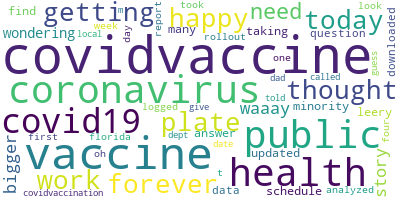

In [8]:
# Visualize wordcloud
## Join the words of the different tweets together into one string
text = str(tweets_df['text_processed'].values).replace("'", "")

## Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', random_state=1, collocations=False, stopwords=STOPWORDS)

## Generate a word cloud
wordcloud.generate(text)

## Visualize the word cloud
wordcloud.to_image()

The word cloud is a basical visualization of the tweets according to word frequency. Collocations are disabled that duplicated words ord phrases are less likely to be visualized. Stopwords in the word cloud dictionary are removed from the text.

## Sentiment Analysis
In this project, sentiment analysis is to identify the public sentiment on the vaccination.

In order to explore people's attitudes and emotions towards COVID-19 vaccine, such as positive, negative or neutral, this project used Vader sentiment as an analysis tool to analyze every text in the data set.

Vader thesaurus construction:
1. The emotional polarity and intensity of 7000+ commonly used emotional words were determined by manual labeling (10 people).
2. Unlike other proposed emotion dictionaries, Vader's dictionary also takes into account commonly used emojis

The influence of Vader's grammar rules on emotion discrimination:
1. ** punctuation ** : such as! Will enhance the emotional intensity of the sentence
2. ** case ** : All uppercase words are more emotionally intense if the sentence contains both case and case
3. ** adverbs ** E.g. Extremely good is much more positive than good
4. ** conjunctions ** : For example, there is a turning conjunction but in the sentence, so that the polarity of the emotion before and after but is reversed, but the general intention is to emphasize the semantic emotion after but.
5. ** negative words ** : Isn't, for example, will cause a subsequent reversal of the emotional subpolarity.

SentimentIntensityAnalyzer output for (pos, neu, neg, compound) discriminant criteria for the project will compound > = 0.05 as positive, compound & compound > 0.05 < 0.05 as neutral, Compound <=-0.05 was considered negative.

### Sentiment Analysis Pipeline
1. Read data
2. For each text using SentimentIntensityAnalyzer judgment sentiment
3. Count the number of each sentiment
4. Count the number of each sentiment on a daily basis
5. Visualize general sentiment using pie charts
6. Use line charts to analyze sentiment changes day by day

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Read the data
data_Jan = pd.read_csv('./data/clean_data.csv')
mydata = list(set(list(data_Jan['text_processed'].values)))
mydata = [t for t in mydata if t]

# Instantiate the Sentiment Analyzer
myAnalyzer = SentimentIntensityAnalyzer()

# Initialize the Sentiment analysis result array
results = []

# Loop every piece of data in social media and analyze Sentiment
for tweet_text in mydata:
    vs = myAnalyzer.polarity_scores(tweet_text)
    results.append(vs)
    
# Compound divides Sentiment into positive, negative and neutral ones
# Store the result in sent[]
sent = []
for i in range(len(results)):
    if results[i]['compound'] >= 0.05:
        sent.append('pos')
    elif results[i]['compound'] > -0.05 and results[i]['compound'] < 0.05:
        sent.append('neu')
    elif results[i]['compound'] <= -0.05:
        sent.append('neg')
    
# Transform the list into dataframe and name it Sentiment
sent_df = pd.DataFrame(sent)
sent_df.columns = ['sentiment']
# Merge with the data set
vader = pd.concat([data_Jan, sent_df], axis=1)

# Set time as an index for querying data by time
vader['date'] = pd.to_datetime(vader['date']) 
vader = vader.set_index('date')

# Print the general results of sentiments
print('Summation of Sentiments')
print(vader['sentiment'].value_counts())

Summation of Sentiments
pos    22916
neu    16620
neg     8967
Name: sentiment, dtype: int64


### Visualization - Proportions of Total Sentiments

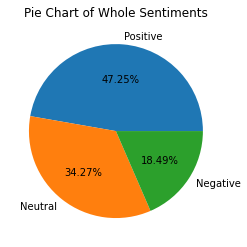

In [10]:
# Visualize the pie chart of the total data
sent_label = ['Positive', 'Neutral', 'Negative']
plt.pie(vader['sentiment'].value_counts(), labels = sent_label, autopct = '%.2f%%')
plt.title('Pie Chart of Whole Sentiments')


# Query Sentiment by day
daily_sent_pos = []
daily_sent_neg = []
daily_sent_neu = []
index = []

for i in range(28):
    d = '2021-01-{}'.format(str(i+1))
    daily_sent = vader[d:d]['sentiment']
    if daily_sent.empty==False:
        daily_sent_pos.append(daily_sent.value_counts()[0])
        daily_sent_neu.append(daily_sent.value_counts()[1])
        daily_sent_neg.append(daily_sent.value_counts()[2])
        index.append(i)

For the results of sentiment analysis, the project adopts the analysis of overall data and day-by-day analysis. The results of the analysis basically met expectations, and multiple COVID-19 vaccines were released and launched in January 2021. After the panic and anxiety of the novel coronavirus infection. About 47 percent of the population reported positive feelings about the introduction of the vaccine, and nearly half reported positive feelings when referring to the COVID-19 vaccine. About 30% of the population is neutral on vaccines, which is probably a group of people who do not have a deep interest in novel Coronavirus and vaccines, believing that novel Coronavirus is just an ordinary infectious disease. A minority of about 20 percent have negative feelings about COVID-19 vaccines, most of them from anti-vaccine groups, according to the comments.

### Visualization - Sentiments with Time

Text(0.5, 1.0, 'Sentiments from 1 Jan to 28 Jan')

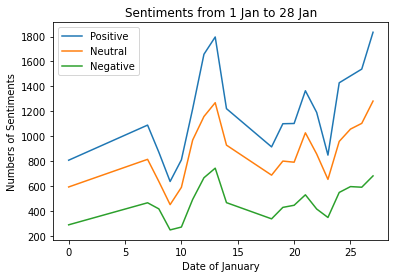

In [11]:
# Visualize the different Sentiment of each day
plt.figure()
plt.plot(index, daily_sent_pos)
plt.plot(index, daily_sent_neu)
plt.plot(index, daily_sent_neg)
plt.xlabel('Date of January')
plt.ylabel('Numbers of Sentiments')
plt.legend(('Positive', 'Neutral', 'Negative'))
plt.title('Sentiments from 1 Jan to 28 Jan')

It can be seen that the proportions of the three emotions are similar during the period, positive emotions are always dominant, and negative emotions are less. As you can see from the graph, the amount of discussion on COVID-19 vaccine increased significantly between mid-January and late January. Detailed analysis is in the report.

## Named Entity Recognition

In this project, the aim of named entity recognition is to find the producers/companies of vaccines people most like to talk about.

### Train NER Model
Because the NER model off-the-shelf doesn't perform well for recognizing vaccine brands, therefore we trained our own model for NER. The vaccine brands for the training includes pfizer, sinopharm, sinovac, covaxin, sputnik v, moderna and astrazeneca.
Please download the trained model through the link: https://drive.google.com/drive/folders/1_C-TYN8eCOVR6F-BEDvlLrKTjTPAEw7y?usp=sharing since it would be very slow if there is not a GPU used for training (We used Google Colab, the following code could run on it). And the config file for training through link: https://drive.google.com/file/d/1HKP3c7p082QUqH-_ktexAIY09pp0cnOT/view?usp=sharing
The following training steps are commented to skip.

In [12]:
import spacy
import pandas as pd 
import numpy as np
from tqdm import tqdm
from spacy.tokens import DocBin
from collections import Counter
import en_core_web_trf

In [13]:
# This environment is only for GPU training, please do not install it if you use cpu
#!pip install -U spacy[cuda101]

### Training data preparation for NER model
This training set is created with the help of SpaCy NER annotation tool http://agateteam.org/spacynerannotate/

In [14]:
# Specify whether to train the model
train_mode = False

if train_mode == True:
    TRAIN_DATA = [
    ("breaking pfizer says covid19 vaccine appears work key mutation variants first found uk",{"entities":[(9,15,"PRODUCT")]}),
    ("express publishes misleading article about safety of the pfizer covid19 vaccine",{"entities":[(57,63,"PRODUCT")]}),
    ("new pfizer data kills the case for universal child covid vaccines",{"entities":[(4,10,"PRODUCT")]}),
    ("pfizer vaccine significantly less effective in children ages five to 11, study shows ",{"entities":[(0,6,"PRODUCT")]}),
    ("ema says not concerned by new york state data on pfizerbiontech vaccine",{"entities":[(49,63,"PRODUCT")]}),
    ("sinopharm kicks off jointproduction of covid19 vaccine in myanmar",{"entities":[(0,9,"PRODUCT")]}),
    ("bpom issues permit to use sinopharm as heterologous vaccine booster",{"entities":[(26,35,"PRODUCT")]}),
    ("antibody triggered by sinopharm covid booster wanes after six months study",{"entities":[(22,31,"PRODUCT")]}),
    ("coronavirus fourth shot of sinopharm vaccine wont boost protection against omicron, study finds",{"entities":[(27,36,"PRODUCT")]}),
    ("man arrested for allegedly running sinopharm jab scam",{"entities":[(35,44,"PRODUCT")]}),
    ("department disease control announced priority groups 18 provinces receive sinovac",{"entities":[(272,279,"PRODUCT")]}),
    ("who validates sinovac vaccine for emergency use and issues interim policy recommendations",{"entities":[(14,21,"PRODUCT")]}),
    ("three shots of sinovac can offer 98 protection against death, severe illness for people aged 60 and above real world data in hk",{"entities":[(15,22,"PRODUCT")]}),
    ("data indicating the sinovac biotech ltd covid19 vaccine is less effective than an mrna vaccine at preventing death in elderly people in hong kong is a red flag for mainland china",{"entities":[(20,27,"PRODUCT")]}),
    ("some people believe sinovac is not efficient",{"entities":[(20,27,"PRODUCT")]}),
    ("covaxin manufacturer defends itself in apex court on trial data",{"entities":[(0,7,"PRODUCT")]}),
    ("what do we know about indias covaxin vaccine",{"entities":[(29,36,"PRODUCT")]}),
    ("covaxin indias first indigenous covid19 vaccine",{"entities":[(0,7,"PRODUCT")]}),
    ("bharat biotechs covaxin is an inactivated covid19 vaccine",{"entities":[(16,23,"PRODUCT")]}),
    ("russian social media promotion of sputnikv in latin america",{"entities":[(34,42,"PRODUCT")]}),
    ("who delays russias sputnikv vaccine review amid ukraine crisis",{"entities":[(19,27,"PRODUCT")]}),
    ("huons global says it will not make russias sputnikv vaccine",{"entities":[(43,51,"PRODUCT")]}),
    ("the gamaleya center has developed sputnikv specifically for adolescents.",{"entities":[(34,42,"PRODUCT")]}),
    ("russian produced sputnikv vaccine for covid19",{"entities":[(17,25,"PRODUCT")]}),
    ("did you receive your first pfizer",{"entities":[(27,33,"PRODUCT")]}),
    ("received pfizerbiontech covid19 vaccine 2 days ago side effects slightly",{"entities":[(9,23,"PRODUCT")]}),
    ("who grants pfizer of emergency use",{"entities":[(11,17,"PRODUCT")]}),
    ("scientists couple behind pfizer",{"entities":[(25,31,"PRODUCT")]}),
    ("china shipped sinopharm vaccine to 53 nations",{"entities":[(14,23,"PRODUCT")]}),
    ("iran welcomed first batches chinese sinopharm covid19 vaccines",{"entities":[(35,45,"PRODUCT")]}),
    ("philippine receives many sinovac from china",{"entities":[(25,32,"PRODUCT")]}),
    ("philippine prefers brand sinovac coronavirus vaccination",{"entities":[(25,32,"PRODUCT")]}),
    ("i hope sinovac vaccine arrived yesterday can be safe and effective",{"entities":[(7,14,"PRODUCT")]}),
    ("i doubts if the effectiveness of covaxin is cleared",{"entities":[(33,40,"PRODUCT")]}),
    ("our prime minister got first dose covid vaccine called covaxin",{"entities":[(55,62,"PRODUCT")]}),
    ("recent study confirms sputnikv is effective to covid mutations",{"entities":[(22,30,"PRODUCT")]}),
    ("please buy russian vaccine which is sputnikv",{"entities":[(36,44,"PRODUCT")]}),
    ("astrazeneca sold 1 billion stake of moderna",{"entities":[(0,11,"PRODUCT"),(36,43,"PRODUCT")]}),
    ("i got my 2nd shot of moderna on friday",{"entities":[(21,28,"PRODUCT")]}),
    ("i received first moderna vaccine yesterday and my arm feels hurt",{"entities":[(17,24,"PRODUCT")]}),
    ("covidvaccine moderna is efficient for us",{"entities":[(13,20,"PRODUCT")]})
    ]

    # Getting the pipeline component 
    nlp = spacy.blank("en")
    db = DocBin()

    for text, annot in tqdm(TRAIN_DATA):
        doc = nlp.make_doc(text)
        ents = []
        for start, end, label in annot["entities"]:
            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)
        doc.ents = ents # label the text with the ents
        db.add(doc)
    db.to_disk("./train.spacy") # save the docbin object

    # Prepare training configuration file
    !python -m spacy init fill-config base_config.cfg config.cfg

    # Training, if there is not a gpu, remove ""--gpu-id 0"
    !python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy --gpu-id 0

### Apply NER Model
In this section, all tweets are split into four weeks and the potential Named Entities are gathered and analyzed based on their week number.

In [15]:
# file_path = 'clean_data.csv'
model_path = 'data/NER_model'

# tweets_df_NER = pd.read_csv(file_path, quotechar='"', encoding='utf-8')
tweets_df_NER = tweets_df

# Transfer str to datetime
tweets_df_NER['date'] = pd.to_datetime(tweets_df_NER['date'])
print(tweets_df_NER['text_processed'].head())

# Split data into different weeks
weeks = [g for n, g in tweets_df_NER.groupby(pd.Grouper(key='date',freq='W'))]

38460    happy thought today getting work plate forever...
38459    need waaay bigger story wondering minority lee...
38458    find updated covidvaccine schedule answer many...
38457    get kind blinded vaccine euphoriathe light end...
38456    covidvaccine fan grotesquely delusional zero i...
Name: text_processed, dtype: object


In [16]:
# This function is used for finding named entities, NEs will be returned in a dictionary
def find_NE(tweets):
    nlp = spacy.load(model_path)
    ne_dict = {}
    counter = 0
    for tweet_text in tweets:
        counter += 1
        # Ignore if it is not a string
        if not isinstance(tweet_text, str):
            continue;
        doc = nlp(tweet_text)
        for ne in doc.ents:
#             print(str(counter) + ":" + tweet_text)
#             print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])
            print("\r" + str(round(counter * 100 /len(tweets),2)) + "%", end="")
            if ne.label_ not in ne_dict:
                ne_dict[ne.label_] = []
            ne_dict[ne.label_].append(tweet_text[ne.start_char:ne.end_char])
    return ne_dict

# For each week's tweets, find their entities
dictionary = []
counter = 0
for week_tweets in weeks:
    counter += 1
    print("Week " + str(counter) + " progress:")
    dic = find_NE(week_tweets['text_processed'])
    dictionary.append(dic)
    print("Week" + str(counter) + " NER Found:", dic)

Week 1 progress:


D:\environments\Anaconda3\envs\TMTT\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


98.46%Week1 NER Found: {'PRODUCT': ['moderna', 'pfizer', 'moderna', 'bottlewithpoppingcork', 'antivaxx', 'txlege', 'antivaxxing', 'vacci', 'readytovaccinate', 'moderna', 'mattgaetz', 'ppl', 'syrinx', 'moderna', 'yessssss', 'phizer', 'pfizerbiontech', 'moderna', 'astrozenaca', 'nvax', 'pfizer', 'wearamask', 'pfizerbiontech', 'pfizerbiontech', 'moderna', 'pfizerbiontech', 'pfizervaccine', 'amp', 'sinopharm', 'pfizer', 'shlak', 'pharmacist', 'superspreaderevent', 'glomgold', 'oxfordastrazeneca', 'pfizer', 'pfizer', 'oxfordastrazeneca', 'amp', 'coros', 'moderna', 'pfizer', 'pfizerbiontech', 'syrinx', 'moderna', 'moderna', 'caanrc', 'covax', 'sinopharm', 'pfizerbiontech', 'icmr', 'isro', 'amp', 'starkd', 'amp', 'pensiveface', 'moderna', 'modernavaccine', 'sputnikv', 'pfizer', 'anc', 'panti', 'facewithtearsofjoy', 'afos', 'pfizerbiontech', 'pfizerbiontech', 'cathedr', 'farmpesa', 'sarscov2', 'oxfordastrazeneca', 'pfizer', 'pfizerbiontech', 'pfizer', 'syrinx', 'pfizer', 'pfizer', 'jvci', 'jcv

99.99%Week3 NER Found: {'PRODUCT': ['vaxchamp', 'pfizerbiontech', 'moderna', 'hcmc', 'nyc', 'sputnikv', 'psa', 'pfizercovidvaccine', 'needlesinarms', 'moderna', 'vax', 'vaxxies', 'moderna', 'novax', 'pfizerbiontech', 'pfizer', 'policycapsule', 'amp', 'nyc', 'nyc', 'antivaxxer', 'pfizer', 'moderna', 'pmmodi', 'pfizer', 'pfizer', 'moderna', 'covaxin', 'kingcuomo', 'pfizerbiontech', 'nyc', 'novavax', 'sarscov2', 'pfizer', 'fb', 'linfox', 'scienceforthewin', 'moderna', 'pfizerbiontech', 'covaxin', 'covaxin', 'astrazeneca', 'pfizer', 'psa', 'antivaxxers', 'pfizer', 'astrazeneca', 'covaxin', 'eucalyptus', 'thinkingface', 'astrazeneca', 'facewithtearsofjoy', 'moderna', 'pfizervaccine', 'astrazeneca', 'pfizer', 'pfizer', 'astrazeneca', 'gptwitter', 'astrazeneca', 'pmmodi', 'astrazeneca', 'sinovac', '1stplacemedal', 'moderna', 'coronawarriors', 'oxfordastrazeneca', 'pfizer', 'moderna', 'spicexpress', 'spicejet', 'spicetag', 'spicexpress', 'pfe', 'pfizerbiontech', 'tingz', 'partypopper', 'newham

99.99%Week4 NER Found: {'PRODUCT': ['astrazeneca', 'facewithtearsofjoy', 'smilingfacewithhearts', 'litterinbinsign', 'pfizer', 'moderna', 'syrinx', 'pfs', 'astrazeneca', 'pakistan', 'paul', 'freda', 'ournhspeople', 'covaxin', 'washingtondc', 'covaxin', 'mcmanus', 'covaxin', 'scottythefukwit', 'covaxin', 'blueheart', 'schottenstein', 'naqvi', 'covaxin', 'pfizer', 'pfizerbiontech', 'mycovidvax', 'pcr', 'pfizer', 'pfizer', 'farmlaws', 'oxfordastrazen', 'roc', 'pfizer', 'amp', 'dcgi', 'alexandra', 'hipaa', 'moderna', 'coronaupdates', 'sicklecell', 'moderna', 'pfizer', 'fauci', 'whiteheart', 'scicomm', 'amp', 'sinovac', 'curevac', 'pfizer', 'moderna', 'smilingfacewithopenhands', 'sarscov2', 'pfizer', 'itv', 'pfizerbiontech', 'pfizer', 'drkalpananagpal', 'pfizer', 'mishra', 'scfas', 'grinningfacewithsmilingeyes', 'scienceiscool', 'pfizer', 'covaxin', 'sussex', 'chikfila', 'pfeizervaccine', 'sicklecell', 'moderna', 'oxfordastrazeneca', 'foldedhandsmediumskintone', 'pfizer', 'pfizer', 'faap', 

99.95%Week5 NER Found: {'PRODUCT': ['amp', 'pfizervaccine', 'moderna', 'pfizer', 'redheart', 'pfizervaccine', 'smilingfacewithsmilingeyes', 'nantz', 'pfizer', 'anthonyfauci', 'astrazeneca', 'moderna', 'mrna', 'pileofpoo', 'pfizervaccine', 'pfizer', 'nyc', 'pfizerbiontech', 'vaxxers', 'sinopharm', 'fauci', 'synbio', 'superbowllv', 'vaccinestrategy', 'pistachiofrappuccino', 'sinopharm', 'towle', 'vaxxer', 'dax', 'couric', 'fauci', 'saltnpepamovie', 'tiktok', 'modern', 'gmo', 'amp', 'moderna', 'sleevesupnola', 'pfizerbiontech', 'pfize', 'fcx', 'clf', 'astrazeneca', 'fauciouchie', 'nebulizer', 'mysuru', 'sarscov2', 'sanjeevani', 'lcsm', 'pfizer', 'astrazeneca', 'pfizer', 'bring', 'moderna', 'moderna', 'biontechpfizer', 'moderna', 'copd', 'pfizervaccine', 'modernavaccine', 'moderna', 'modernainc', 'antivaxxers', 'coronavac', 'pfizer', 'crsphcda', 'facewithtearsofjoy', 'amp', 'pfizer', 'astrazeneca', 'bigpharma', 'bigpharma', 'covax', 'fauci', 'facemask', 'pcr', 'astrazeneca', 'pfizerbiontec

The following code is used to count the number of occurrences of various named entities.

In [17]:
# This function is used for identify Named Entites 
def find_vaccine(dictionary):
    brand = {}
    products = Counter(dictionary["PRODUCT"])
    for item in products.items():
        if item[0].isalpha():
            brand[item[0]] = item[1]
    # sort data
    brand = sorted(brand.items(),key=lambda item:item[1],reverse=True)
    brand = brand[:12]
    return brand

# This fucntion merge different dictionary into one
def merge_dicts(dictionary):
    result = {'PRODUCT':[]}
    for dic in dictionary:
        for item in dic['PRODUCT']:
            result['PRODUCT'].append(item)
    return result

# Prepare the data for different weeks
brands = []
counter = 0
for dic in dictionary:
    counter += 1
    brand = find_vaccine(dic)
    print("week" + str(counter) + ": ", brand)
    brands.append(brand)
    print("\n")

    
# Prepare the data for the whole month
dict_mon = merge_dicts(dictionary)
brands_mon = find_vaccine(dict_mon)
print('month: ', brands_mon)

week1:  [('pfizer', 44), ('moderna', 17), ('pfizerbiontech', 16), ('astrazeneca', 15), ('oxfordastrazeneca', 14), ('covaxin', 8), ('amp', 6), ('syrinx', 5), ('pfizervaccine', 5), ('biontech', 4), ('sinopharm', 3), ('vax', 3)]


week2:  [('pfizer', 210), ('moderna', 106), ('pfizerbiontech', 62), ('covaxin', 47), ('pfizervaccine', 36), ('astrazeneca', 19), ('philip', 16), ('amp', 14), ('vax', 12), ('pfizercovidvaccine', 10), ('aneurysm', 7), ('letuscometoaus', 7)]


week3:  [('pfizer', 315), ('moderna', 190), ('covaxin', 149), ('pfizerbiontech', 81), ('astrazeneca', 80), ('sinovac', 40), ('pfizervaccine', 34), ('amp', 29), ('nyc', 21), ('vax', 18), ('antivaxxers', 15), ('pfizercovidvaccine', 14)]


week4:  [('pfizer', 321), ('moderna', 180), ('astrazeneca', 70), ('covaxin', 66), ('pfizerbiontech', 49), ('fauci', 36), ('pfizervaccine', 35), ('amp', 34), ('oxfordastrazeneca', 23), ('fauciouchie', 22), ('covax', 17), ('drfauci', 16)]


week5:  [('pfizer', 266), ('moderna', 225), ('astrazene

Prepare data for plot graphs, store data with list format.

In [18]:
def tuple_2_list(tpl):
    counter = 0
    x = []
    y = []
    

# Store tuples into list
counter = 0
for brand in brands:
    counter += 1
    name = []
    quan = []
    print(f'week {counter}: ')
    for item in brand:
        name.append(item[0])
        quan.append(item[1])
    print("brand: ", name)
    print("quantity: ", quan)

week 1: 
brand:  ['pfizer', 'moderna', 'pfizerbiontech', 'astrazeneca', 'oxfordastrazeneca', 'covaxin', 'amp', 'syrinx', 'pfizervaccine', 'biontech', 'sinopharm', 'vax']
quantity:  [44, 17, 16, 15, 14, 8, 6, 5, 5, 4, 3, 3]
week 2: 
brand:  ['pfizer', 'moderna', 'pfizerbiontech', 'covaxin', 'pfizervaccine', 'astrazeneca', 'philip', 'amp', 'vax', 'pfizercovidvaccine', 'aneurysm', 'letuscometoaus']
quantity:  [210, 106, 62, 47, 36, 19, 16, 14, 12, 10, 7, 7]
week 3: 
brand:  ['pfizer', 'moderna', 'covaxin', 'pfizerbiontech', 'astrazeneca', 'sinovac', 'pfizervaccine', 'amp', 'nyc', 'vax', 'antivaxxers', 'pfizercovidvaccine']
quantity:  [315, 190, 149, 81, 80, 40, 34, 29, 21, 18, 15, 14]
week 4: 
brand:  ['pfizer', 'moderna', 'astrazeneca', 'covaxin', 'pfizerbiontech', 'fauci', 'pfizervaccine', 'amp', 'oxfordastrazeneca', 'fauciouchie', 'covax', 'drfauci']
quantity:  [321, 180, 70, 66, 49, 36, 35, 34, 23, 22, 17, 16]
week 5: 
brand:  ['pfizer', 'moderna', 'astrazeneca', 'pfizerbiontech', 'pf

### Visualization - NER Whole Month
The following graph shows the top 12 named entities about covid vaccine brands in January.

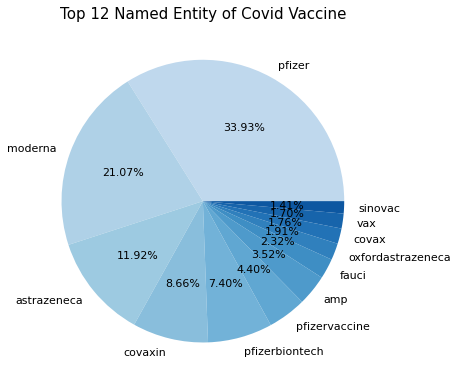

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
x_data = []
y_data = []
for brand in brands_mon:
    x_data.append(brand[0])
    y_data.append(brand[1])

y = np.array(y_data)

plt.figure(figsize=(20, 6.5))
plt.pie(y,
        labels=x_data, 
        colors= plt.get_cmap('Blues')(np.linspace(0.27, 0.85, len(y))),
        autopct='%.2f%%',
        textprops={'fontsize': 11}
       )
plt.title("Top 12 Named Entity of Covid Vaccine", fontsize=15)
plt.show()

### Visualization - NER Different Weeks
The following graph shows how the topic popularity of the four vaccines brands (pfizer, moderna, astrazeneca, covaxin) has changed over a five-week period. The reason that there is 5 weeks in a month is that we splited data into weeks by referencing the calendar.

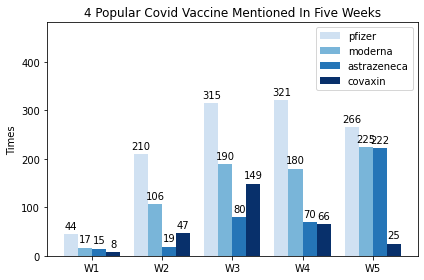

In [20]:
# Data preparation
data_x = []
data_y = []

for brand in brands:
    temp_x = []
    temp_y = []
    for item in brand:
        temp_x.append(item[0])
        temp_y.append(item[1])
    data_x.append(temp_x)
    data_y.append(temp_y)

labels = ['W1', 'W2', 'W3', 'W4','W5']

top1 = [y[x.index('pfizer')] for x,y in zip(data_x, data_y)]
top2 = [y[x.index('moderna')] for x,y in zip(data_x, data_y)]
top3 = [y[x.index('astrazeneca')] for x,y in zip(data_x, data_y)]
top4 = [y[x.index('covaxin')] for x,y in zip(data_x, data_y)]

colors= plt.get_cmap('Blues')(np.linspace(0.2, 1, 4))

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, top1, width, label='pfizer', color = colors[0])
rects2 = ax.bar(x - width/2, top2, width, label='moderna', color = colors[1])
rects3 = ax.bar(x + width/2, top3, width, label='astrazeneca', color = colors[2])
rects4 = ax.bar(x + 3*width/2, top4, width, label='covaxin', color = colors[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Times')
ax.set_title('4 Popular Covid Vaccine Mentioned In Five Weeks')
ax.set_xticks(x, labels)
ax.set_ylim(0, max(top1+top2+top3+top4)*1.5)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

## Topic Modelling
Topic modelling is an approach to automatically finding a series of topics from a collection of documents. In this project, topic modelling aims to capture the potential topics when people talk about the COVID-19 vaccine. We need to draw several topics from Twitter's data to realize the main components of what people think about COVID-19 vaccines. The main process is divided into the following steps: 

(1) Clean the data (i.e. removing stopwords, making bigrams, and lemmatizing). 

(2) Create corpus and dictionary by the use of BoW representation. 

(3) Train the Latent Dirichlet Allocation (LDA) model.

First, import libraries that are used in the sections of Topic Modelling:

In [21]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
import nltk

### Clean Data

Fuctions for cleaning data:

In [22]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]

# connnet two words which could be a bigram
def make_bigrams(texts): 
    return [bigram_mod[doc] for doc in texts]

# select words which are Noun, Adj, Verb, ADV
def words_select(sentences): 
    select = []
    for sentence in sentences:
        words = ''
        for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
            if (pos == 'NN' or pos == 'JJ' or pos == 'VB' or pos == 'RB'):
                words = words + ' ' + word
        select.append(words)
    return select

Start to clean the data through functions above, here we have 4 steps:

(1) Select useful words. Use word tags from nltk library to select words which are Noun, Adj, Verb and Adv. This could make the content of the topic terms we get easier to understand.

(2) Convert sentences into words.

(3) Remove stopwords. Although the same operation has been done in the pretreatment, we still need to delete some specific words for Topic Modelling. As can be seen in the following code, the first line stopwords are some words that have no substantive significance to the topic analysis, and the second line is the words that appear too many times in the data. We consider that their presence in the terminology is not helpful to our analysis, so we remove them from the data here.

(4) Create bigrams. We want to recognize phrases so that the topic model can recognize them. Bigrams is a two-word phrase, such as "social media". This helps the LDA model cluster topics better, because nouns are a better indicator of the topic being talked about.

In [23]:
stop_words = []
stop_words.extend(['get', 'got', 'take', 'amp', 'still', 'please', 'today', 'dr', 'even', 'also', 'year', 'day', 'feel'])
stop_words.extend(['vaccine', 'covidvaccine', 'covid', 'vaccinated', 'vaccines', 'vaccination'])
path = './data/clean_data.csv'
data = pd.read_csv(path, encoding = "utf-8", index_col=0)

# Select useful words
data_processed = list(set(list(data['text_processed'].values)))

data_processed = words_select(data_processed)


# Convert sentences into words
data_words = list(sent_to_words(data_processed))

# Build the bigram and models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Remove stop words
data_words = remove_stopwords(data_words)

# From bigrams
data_words = make_bigrams(data_words)

### Create Corpus and Dictionary

In [24]:
# Create a dictionary
id2word = corpora.Dictionary(data_words)

# Create a corpus
texts = data_words

# Convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]

### Train the LDA Model

In order to find better result for Topic Modelling, we first used CV Coherence Score to help us find the suitable number of topics.

In [25]:
# May take long time
c_v = []
for i in range(14):
    num_topics = i + 2
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    # Compute Coherence Scores
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCV Coherence Score with ', num_topics, 'topics: ', coherence_lda)
    c_v.append(coherence_lda)


CV Coherence Score with  2 topics:  0.18017270719080766

CV Coherence Score with  3 topics:  0.15724354866714915

CV Coherence Score with  4 topics:  0.18177111823542075

CV Coherence Score with  5 topics:  0.2036830644570417

CV Coherence Score with  6 topics:  0.22130345969794643

CV Coherence Score with  7 topics:  0.2369626447639209

CV Coherence Score with  8 topics:  0.2718738572202003

CV Coherence Score with  9 topics:  0.2668459139871928

CV Coherence Score with  10 topics:  0.2950027151543978

CV Coherence Score with  11 topics:  0.29690195304241634

CV Coherence Score with  12 topics:  0.3094148641197611

CV Coherence Score with  13 topics:  0.36996436554380385

CV Coherence Score with  14 topics:  0.343175745750066

CV Coherence Score with  15 topics:  0.33096303664599075


### Visualization - CV Coherence Scores

Visualize the result of CV Coherence Scores in different Vumber of Topics.

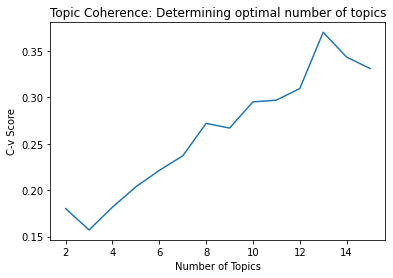

In [26]:
import matplotlib.pyplot as plt

y = c_v
x = []
for i in range(14):
    x_hat = i + 2
    x.append(x_hat)
plt.figure()
plt.plot(x, y)
plt.title("Topic Coherence: Determining optimal number of topics")
plt.xlabel("Number of Topics") 
plt.ylabel("C-v Score") 
plt.show()

Since the coherence score seems to increase as the number of topics increases, it may make more sense to choose a model that gives the highest CV before flattening out or dropping significantly. In this case, we choose Number of Topics = 13.

In [27]:
# Set number of topics
num_topics = 13

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Evaluate the LDA model
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"centre" + 0.027*"line" + 0.026*"doe" + 0.025*"read" + 0.018*"show" + '
  '0.017*"round" + 0.016*"finally" + 0.015*"population" + 0.014*"research" + '
  '0.014*"pay"'),
 (1,
  '0.027*"help" + 0.026*"question" + 0.025*"death" + 0.022*"know" + '
  '0.019*"share" + 0.016*"case" + 0.015*"protect" + 0.015*"ha" + '
  '0.015*"expert" + 0.014*"new"'),
 (2,
  '0.047*"india" + 0.033*"uk" + 0.033*"country" + 0.031*"world" + '
  '0.025*"really" + 0.022*"tomorrow" + 0.022*"enough" + 0.020*"live" + '
  '0.020*"government" + 0.019*"astrazeneca"'),
 (3,
  '0.057*"thank" + 0.033*"safe" + 0.033*"team" + 0.032*"community" + '
  '0.025*"see" + 0.023*"family" + 0.020*"way" + 0.016*"give" + 0.016*"science" '
  '+ 0.014*"member"'),
 (4,
  '0.040*"dos" + 0.023*"india" + 0.020*"covishield" + 0.020*"already" + '
  '0.018*"ha" + 0.018*"covaxin" + 0.018*"healthcare" + 0.016*"mask" + '
  '0.016*"group" + 0.015*"january"'),
 (5,
  '0.068*"wa" + 0.049*"week" + 0.038*"shot" + 0.031*"last" + 0.024*"life"

### Visualization - pyLDAvis

Use pyLDAvis to visualize topic relationships. The pyLDAvis package in Python gives two important pieces of information. The circles represent each topic. The distance between the circles visualizes topic relatedness. These are mapped through dimensionality reduction (PCA/t-sne) on distances between each topic’s probability distributions into 2D space. This shows whether our model developed distinct topics. The visualization result is also output in an html file in the directory. 

In [28]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./LDA_visualization')

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './LDA_visualization.html')

LDAvis_prepared

D:\environments\Anaconda3\envs\TMTT\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.281969  0.032521       1        1  10.021916
11    -0.024833 -0.019656       2        1   8.630627
4     -0.129834 -0.080898       3        1   8.282343
5      0.223419  0.014103       4        1   8.079398
3     -0.015717  0.342709       5        1   7.980780
2     -0.171117  0.058403       6        1   7.697106
10    -0.056913 -0.064841       7        1   7.502144
1     -0.084687 -0.104260       8        1   7.228247
8     -0.138462  0.065810       9        1   7.225541
6      0.039288 -0.077235      10        1   7.215291
7      0.113321 -0.097153      11        1   7.044848
9     -0.007157  0.030250      12        1   6.937286
0     -0.029278 -0.099754      13        1   6.154471, topic_info=        Term         Freq        Total Category  logprob  loglift
142    first  3635.000000  3635.000000  Default  30.0000  30.0000
112     dose  3243.000000  3243.000000  Default  29.0000  29.0000
177   health  1689.000000  1689.000000  Default  28.0000  28.0000
19        wa  1696.000000  1696.000000  Default  27.0000  27.0000
333    thank  1234.000000  1234.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
491    issue   177.248763   253.721928  Topic13  -4.5320   2.4293
1096  differ   212.262041   373.069519  Topic13  -4.3517   2.2240
676   supply   227.265577   537.235470  Topic13  -4.2834   1.9277
498     wait   174.691502   374.242457  Topic13  -4.5465   2.0261
589    month   181.949735   456.136727  Topic13  -4.5058   1.8689

[709 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
211       1  0.213044   able
211       2  0.106522   able
211       4  0.152473   able
211       6  0.104433   able
211       7  0.079369   able
...     ...       ...    ...
625       8  0.008849  young
625       9  0.982278  young
629       3  0.026617   yous
629       8  0.964865   yous
629      11  0.006654   yous

[1649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 12, 5, 6, 4, 3, 11, 2, 9, 7, 8, 10, 1])